In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [209]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [249]:
path = os.getcwd()
mypath = path + "/" + "drive/My Drive/Colab Notebooks/Hand_Gesture"
train_data = pd.read_csv(mypath + '/' + "sign_mnist_train.csv")
test_data = pd.read_csv(mypath + '/' + "sign_mnist_test.csv")

In [239]:
print("The Shape of Data is:",train_data.shape, test_data.shape)
print("Number of Data Sample in Training Data: ", train_data.shape[0])
print("Number of Data Sample in Test Data: ", test_data.shape[0])

The Shape of Data is: (27455, 785) (7172, 785)
Number of Data Sample in Training Data:  27455
Number of Data Sample in Test Data:  7172


In [212]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [213]:
labels = train_data['label'].values

# OR

# train_data_labels = train_data.iloc[:,0]
# train_data_images = train_data.iloc[:,1:]

# train_data_images = np.array(train_data_images)
# train_data_labels = np.array(train_data_labels)

labels

array([ 3,  6,  2, ..., 18, 17, 23])

The data set is given in the form of labels and pixel value ranging from pixel 1 to pixel 784 which is 28 * 28 image.

Let's see what does each sign means

In [214]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

Each letter indicates a sign produced by our fingers. We will apply deep learning to these images to make sure our model can understand what sign indicated what letter

## **Data Exploration:**

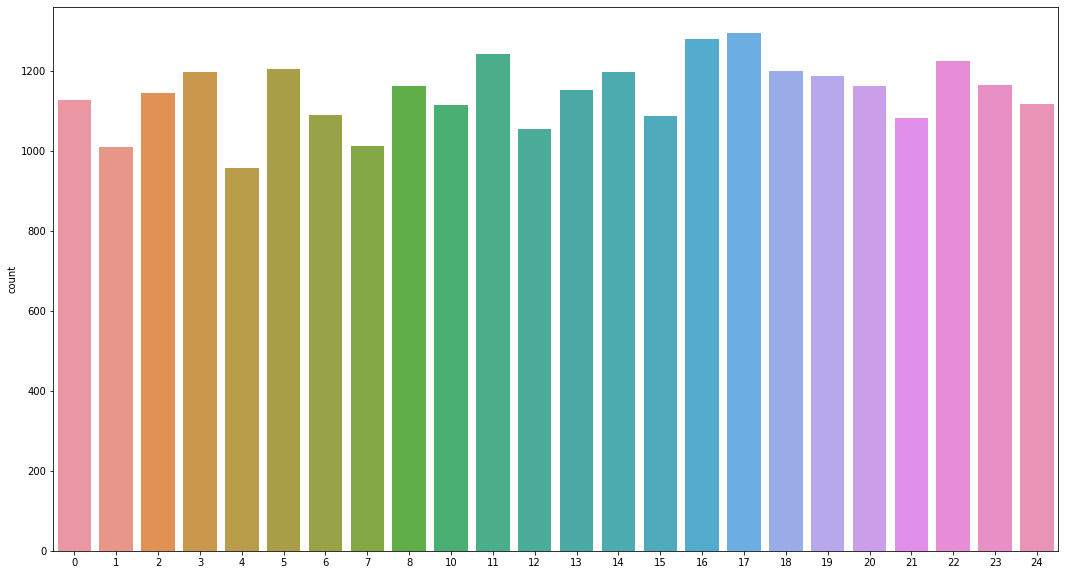

In [215]:
plt.figure(figsize=(18,10))
sns.countplot(x=labels)

The above plot shows the frequency of the number of labels which is a histogram (shows the distribution of labels). We can see that each one is almost equally distibuted.

In [216]:
train_data.drop('label', axis=1, inplace=True)

We are droping the label column from the training set.

## **Reshaping the Image.**

In [ ]:
images = train_data.values
images = np.array([np.reshape(i, (28,28)) for i in images])
images = np.array([i.flatten() for i in images])

Since our target variable are in categorical(nomial) so we are using label binarizer

In [218]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

Lets see how the Image Look like:

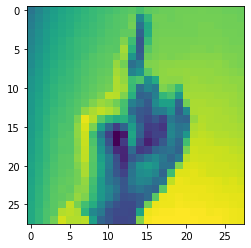

In [220]:
plt.imshow(images[0].reshape((28,28)))

Spliting the training dataset into train(70%) and test(30%) for validation

In [221]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

For deep learning i am using keras library

Creating the batch size to 128 and using 50 epochs

In [222]:
batch_size = 128
num_classes = 24
epochs = 50

Normalizing the training and test data

In [223]:
x_train = x_train / 255
x_test = x_test / 255

In [224]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [225]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Visualizing the image after normalizing

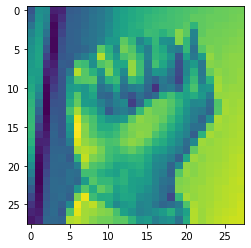

In [226]:
plt.imshow(x_train[0].reshape(28,28))

## **CNN Model:**

In [42]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation='softmax'))

In [43]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [44]:
history = model.fit(x_train,y_train, validation_data= (x_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/50
151/151 [==============================] - 31s 203ms/step - loss: 2.2090 - accuracy: 0.3263 - val_loss: 0.7878 - val_accuracy: 0.7652
Epoch 2/50
151/151 [==============================] - 31s 206ms/step - loss: 0.5854 - accuracy: 0.8055 - val_loss: 0.2380 - val_accuracy: 0.9350
Epoch 3/50
151/151 [==============================] - 31s 207ms/step - loss: 0.2231 - accuracy: 0.9280 - val_loss: 0.0796 - val_accuracy: 0.9868
Epoch 4/50
151/151 [==============================] - 31s 208ms/step - loss: 0.1100 - accuracy: 0.9677 - val_loss: 0.0256 - val_accuracy: 0.9985
Epoch 5/50
151/151 [==============================] - 31s 207ms/step - loss: 0.0587 - accuracy: 0.9846 - val_loss: 0.0124 - val_accuracy: 0.9995
Epoch 6/50
151/151 [==============================] - 31s 207ms/step - loss: 0.0339 - accuracy: 0.9915 - val_loss: 0.0066 - val_accuracy: 0.9995
Epoch 7/50
151/151 [==============================] - 31s 208ms/step - loss: 0.0251 - accuracy: 0.9937 - val_loss: 0.0038 - val_ac

As you can see, the number of epochs increase the accuracy also increases.

In [227]:
len(history.history['accuracy'])

50

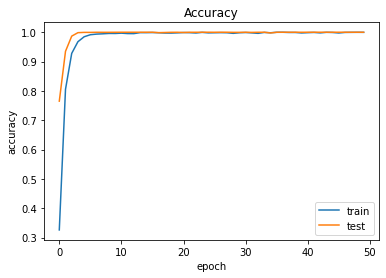

In [228]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

# Saving the model to disk:

In [240]:
# import pickle
# pickle.dump(model, open('model.pkl','wb'))

Let's validate with the test data

In [250]:
test_labels = test_data['label']

In [251]:
test_data.drop('label', axis = 1, inplace = True)

In [252]:
test_data.shape

(7172, 784)

In [253]:
test_images = test_data.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [254]:
test_labels = label_binarizer.fit_transform(test_labels)

In [255]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [256]:
test_images.shape

(7172, 28, 28, 1)

Predecting with test images

## **Provide the Index to Check which Image is present at that index:**
Please Enter a Number between {0 and 7172}....

In [276]:
index_for_image = 4000

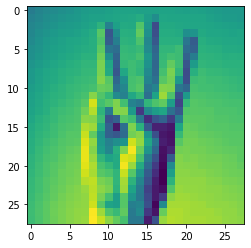

In [277]:
sample_img  = np.reshape(test_images[index_for_image],(28,28))
plt.imshow(sample_img)

In [271]:
y_pred = model.predict(test_images)

## **Applying the Inverse Transform to get our original Label back from Binary_Encoded Labels:**
The code below tell the predicted label from the Model and Compare it with the above image to Check the results.

In [280]:
labels_inv = label_binarizer.inverse_transform(y_pred)
int_label = labels_inv[index_for_image]
print(int_label)

# One Hot encoding:
def conver_to_char(word):
    word_dict = {0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G", 7:"H", 8:"I",
                 9:"J", 10:"K", 11:"L", 12:"M", 13:"N", 14:"O", 15:"P", 16:"Q",
                 17:"R", 18:"S", 19:"T", 20:"U", 21:"V", 22:"W", 23:"X", 24:"Y",
                 25:"Z"}
    return word_dict[word]
print(conver_to_char(int_label))

22
W


In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(test_labels, y_pred.round())

0.9114612381483547

As we can see we got a really great accuracy

We can increate the accuracy by tuning the hyper parameters of the model like playing with different activation functions and using different loss functions

In [97]:
class_name = ["A", "B", "C", "D", "E", "F", "G", "H", "I",
                 "K", "L", "M", "N", "O", "P", "Q", "R",
                 "S", "T", "U", "V", "W", "X", "Y"]

## **Finished**